In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import os

In [8]:
folder_path = 'E:\\DataWar\\Sales_data'

all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

dataframes = [pd.read_csv(file) for file in all_files]
sales_data = pd.concat(dataframes, ignore_index=True)

print(sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


## Exploratory Data Analysis (EDA)
 1. Data Overview
 • Howmanyuniqueproducts are there in the dataset?
 • Whatis the range of order dates in the dataset?
 • Are there any missing or null values? If yes, how will you handle them?
 • Are there any duplicate rows in the dataset? If yes, should they be removed?
 2. Basic Statistics
 • Whatis the average quantity ordered for each product?
 • Whatis the total revenue generated from all sales?
 • Whatis the minimum, maximum, and average price of the products sold?
 3. Data Cleaning
 • Identify and clean invalid data in the Order Date column (e.g., non-datetime values).
 • Extract useful information from Order Date, such as month, day, and hour.
 • Split Purchase Address into components like city, state, and ZIP code for analysis

In [9]:
unique_products = sales_data['Product'].nunique()
print(f"Number of unique products: {unique_products}")



Number of unique products: 20


In [11]:
missing_values = sales_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

sales_data = sales_data.dropna()

duplicates = sales_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    sales_data = sales_data.drop_duplicates()
    print("Duplicates removed.")

Missing values per column:
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
Number of duplicate rows: 618
Duplicates removed.


In [14]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [17]:
import warnings
warnings.filterwarnings("ignore")

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')

sales_data = sales_data.dropna(subset=['Quantity Ordered'])

avg_quantity_per_product = sales_data.groupby('Product')['Quantity Ordered'].mean()
print("Average quantity ordered for each product:")
print(avg_quantity_per_product)

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

sales_data['Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

total_revenue = sales_data['Revenue'].sum()
print(f"\nTotal revenue generated: {total_revenue}")

min_price = sales_data['Price Each'].min()
max_price = sales_data['Price Each'].max()
avg_price = sales_data['Price Each'].mean()
print(f"\nPrice Statistics:")
print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")
print(f"Average price: {avg_price}")


Average quantity ordered for each product:
Product
20in Monitor                  1.006833
27in 4K Gaming Monitor        1.002249
27in FHD Monitor              1.005735
34in Ultrawide Monitor        1.002915
AA Batteries (4-pack)         1.343273
AAA Batteries (4-pack)        1.503299
Apple Airpods Headphones      1.007214
Bose SoundSport Headphones    1.009926
Flatscreen TV                 1.003963
Google Phone                  1.001268
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.072143
Macbook Pro Laptop            1.000847
ThinkPad Laptop               1.000485
USB-C Charging Cable          1.094789
Vareebadd Phone               1.001453
Wired Headphones              1.088864
iPhone                        1.001023
Name: Quantity Ordered, dtype: float64

Total revenue generated: 34465537.94

Price Statistics:
Minimum price: 2.99
Maximum price: 1700.0
Average price: 184.51925546352444


In [19]:
print("Unique values in Order Date column before cleaning:")
print(sales_data['Order Date'].unique())

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

sales_data = sales_data.dropna(subset=['Order Date'])

sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Day'] = sales_data['Order Date'].dt.day
sales_data['Hour'] = sales_data['Order Date'].dt.hour

print("Cleaned data with extracted datetime information:")
print(sales_data[['Order Date', 'Month', 'Day', 'Hour']].head())


Unique values in Order Date column before cleaning:
['04/19/19 08:46' '04/07/19 22:30' '04/12/19 14:38' ... '09/23/19 07:39'
 '09/19/19 17:30' '09/30/19 00:18']
Cleaned data with extracted datetime information:
           Order Date  Month  Day  Hour
0 2019-04-19 08:46:00      4   19     8
2 2019-04-07 22:30:00      4    7    22
3 2019-04-12 14:38:00      4   12    14
4 2019-04-12 14:38:00      4   12    14
5 2019-04-30 09:27:00      4   30     9


 ## Sales Performance Analysis
 4. Best Month for Sales
 • Identify the month with the highest sales revenue.
 • Visualize sales revenue by month using a bar plot or line chart.
 5. Best Time for Display Advertisement
 • Analyze the hours with the highest number of orders.
 • Suggest the best time to display advertisements to maximize sales.
 6. MostProduct-Selling City
 • Which city has the highest sales revenue?
 • Visualize city-wise sales using a bar plot or map-based visualization

The best month for sales is Month 12 with revenue: $4608295.70


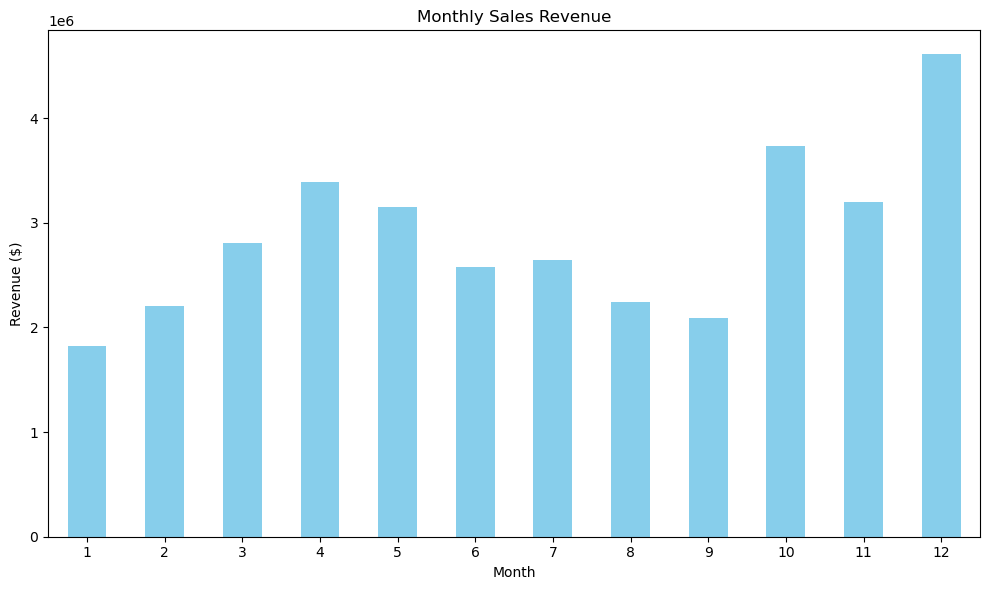

In [20]:
monthly_revenue = sales_data.groupby('Month')['Revenue'].sum()

best_month = monthly_revenue.idxmax()
best_month_revenue = monthly_revenue.max()
print(f"The best month for sales is Month {best_month} with revenue: ${best_month_revenue:.2f}")

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The best time for displaying advertisements is around 19:00 with 14451.0 orders.


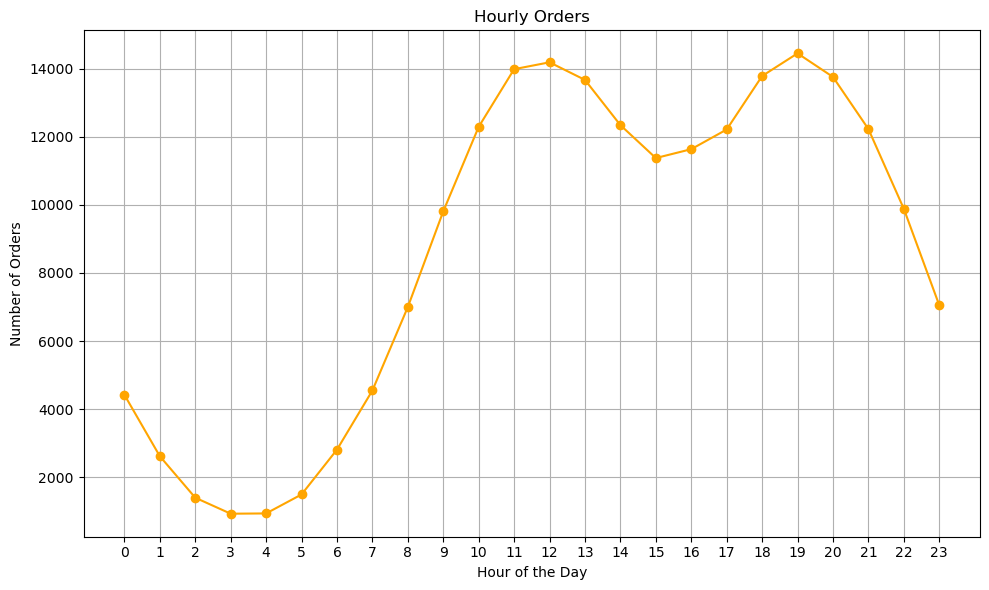

In [21]:
hourly_orders = sales_data.groupby('Hour')['Quantity Ordered'].sum()

best_hour = hourly_orders.idxmax()
best_hour_orders = hourly_orders.max()
print(f"The best time for displaying advertisements is around {best_hour}:00 with {best_hour_orders} orders.")

plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Orders')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()


The city with the highest sales revenue is San Francisco, CA with revenue: $8254743.55


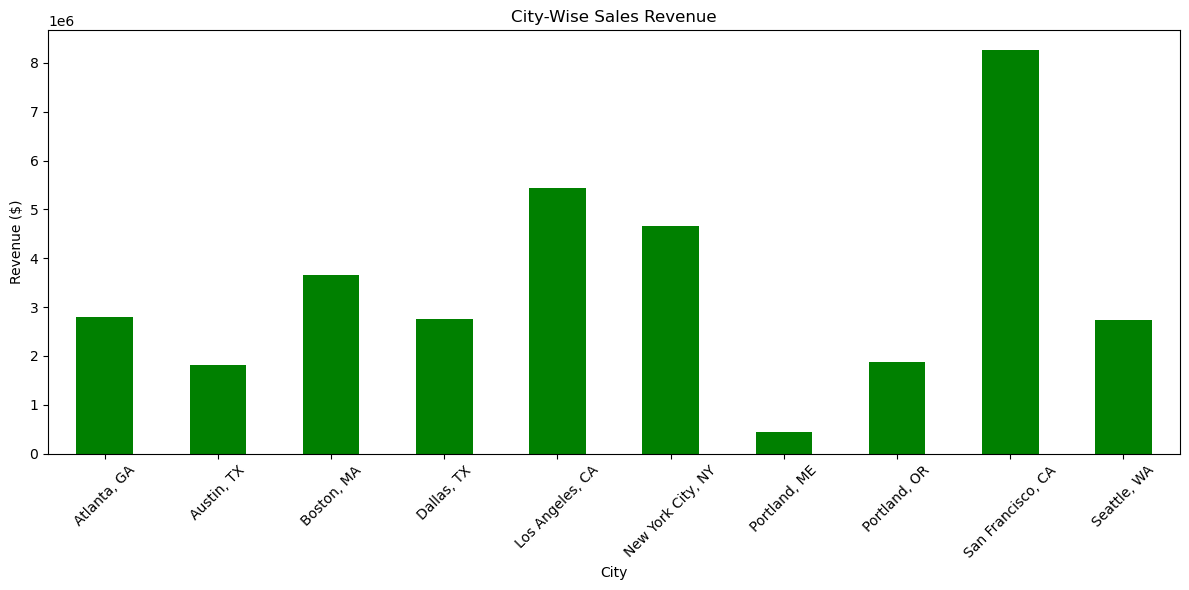

In [22]:
sales_data['City'] = sales_data['Purchase Address'].str.extract(r',\s*(.*?)\s*\d{5}')[0]

city_revenue = sales_data.groupby('City')['Revenue'].sum()

best_city = city_revenue.idxmax()
best_city_revenue = city_revenue.max()
print(f"The city with the highest sales revenue is {best_city} with revenue: ${best_city_revenue:.2f}")

plt.figure(figsize=(12, 6))
city_revenue.plot(kind='bar', color='green')
plt.title('City-Wise Sales Revenue')
plt.xlabel('City')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Product-Specific Analysis
 7. MostSold Products
 • Identify the top 5 most sold products by quantity.
 • Whatcould be the possible reasons for these products’ popularity? (e.g., price,
 seasonality, bundling)
8. Products Most Often Sold Together
 • Find product pairs that are frequently sold together in the same order.
 • Suggest potential bundling strategies based on the insights.
 9. Price vs. Quantity Relationship
 • Analyze the relationship between product price and quantity ordered.
 • Are lower-priced items sold in higher quantities?

Top 5 most sold products by quantity:
Product
AAA Batteries (4-pack)      30986.0
AA Batteries (4-pack)       27615.0
USB-C Charging Cable        23931.0
Lightning Charging Cable    23169.0
Wired Headphones            20524.0
Name: Quantity Ordered, dtype: float64


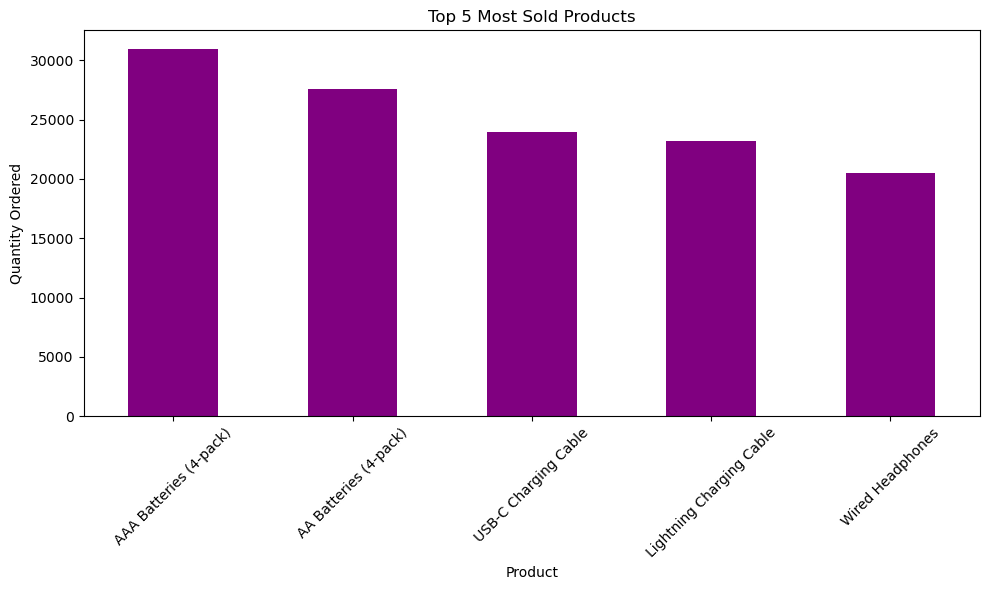

In [23]:
top_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)
print("Top 5 most sold products by quantity:")
print(top_products)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 5 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
from itertools import combinations
from collections import Counter

grouped_orders = sales_data[sales_data['Order ID'].duplicated(keep=False)]
grouped_orders['Grouped'] = grouped_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
grouped_orders = grouped_orders[['Order ID', 'Grouped']].drop_duplicates()

product_pairs = Counter()
for group in grouped_orders['Grouped']:
    products = group.split(',')
    product_pairs.update(combinations(sorted(products), 2))

most_common_pairs = product_pairs.most_common(5)
print("Top 5 product pairs sold together:")
for pair, count in most_common_pairs:
    print(f"{pair}: {count} times")

print("\nSuggestions for bundling:")
for pair, _ in most_common_pairs:
    print(f"Consider bundling {pair[0]} and {pair[1]} together.")


Top 5 product pairs sold together:
('Lightning Charging Cable', 'iPhone'): 1011 times
('Google Phone', 'USB-C Charging Cable'): 997 times
('Wired Headphones', 'iPhone'): 462 times
('Google Phone', 'Wired Headphones'): 422 times
('Apple Airpods Headphones', 'iPhone'): 373 times

Suggestions for bundling:
Consider bundling Lightning Charging Cable and iPhone together.
Consider bundling Google Phone and USB-C Charging Cable together.
Consider bundling Wired Headphones and iPhone together.
Consider bundling Google Phone and Wired Headphones together.
Consider bundling Apple Airpods Headphones and iPhone together.


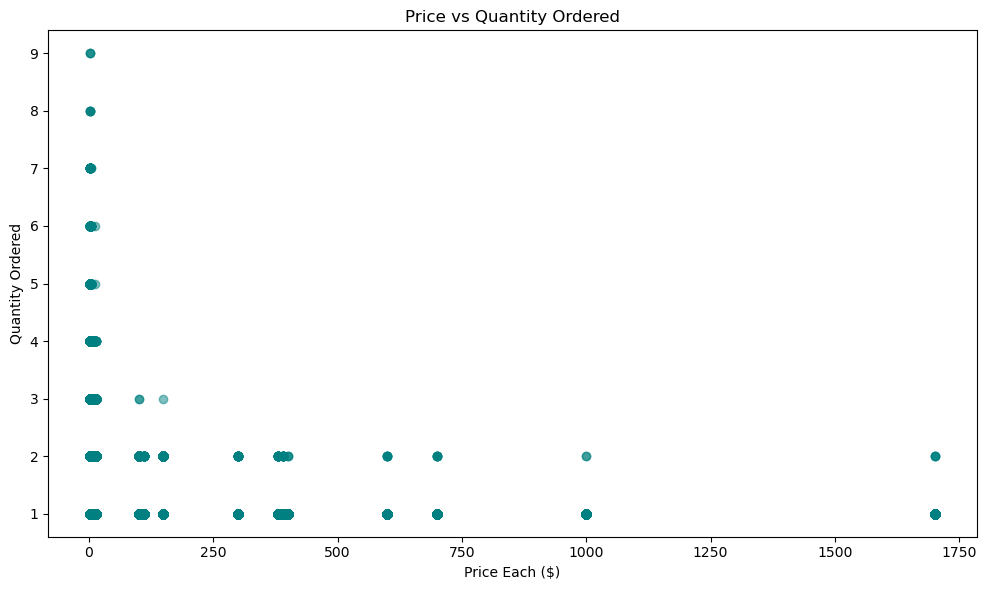

Low-priced items tend to have higher quantities ordered. Example:
  Order ID               Product  Quantity Ordered  Price Each  \
0   176558  USB-C Charging Cable               2.0       11.95   
4   176560      Wired Headphones               1.0       11.99   
5   176561      Wired Headphones               1.0       11.99   
6   176562  USB-C Charging Cable               1.0       11.95   
8   176564  USB-C Charging Cable               1.0       11.95   

           Order Date                        Purchase Address  Revenue  Month  \
0 2019-04-19 08:46:00            917 1st St, Dallas, TX 75001    23.90      4   
4 2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001    11.99      4   
5 2019-04-30 09:27:00       333 8th St, Los Angeles, CA 90001    11.99      4   
6 2019-04-29 13:03:00  381 Wilson St, San Francisco, CA 94016    11.95      4   
8 2019-04-12 10:58:00         790 Ridge St, Atlanta, GA 30301    11.95      4   

   Day  Hour               City  
0   19     8    

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Price Each'], sales_data['Quantity Ordered'], alpha=0.5, color='teal')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each ($)')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

low_price_high_quantity = sales_data[sales_data['Price Each'] < sales_data['Price Each'].median()]
print(f"Low-priced items tend to have higher quantities ordered. Example:\n{low_price_high_quantity.head()}")


## Customer Insights
 10.Most Active Customers
 • Identify customers (based on Purchase Address) who have made the highest number
 of purchases or generated the highest revenue.
 • Whatpercentage of revenue do the top 10% of customers contribute?
 11.City-Wise Product Preferences
 • Which products are most popular in different cities?
 • Are there city-specific trends that might indicate localized preferences?
 12.Time-Based Trends
 • Identify weekly and daily patterns in sales.
 • Whatare the busiest days of the week for sales?

In [26]:
customer_activity = sales_data.groupby('Purchase Address').agg(
    total_purchases=('Quantity Ordered', 'sum'),
    total_revenue=('Revenue', 'sum')
).reset_index()

most_active_customers = customer_activity.sort_values(by='total_revenue', ascending=False)

top_10_customers = most_active_customers.head(10)

print("Top 10 Most Active Customers based on Revenue:")
print(top_10_customers)

total_revenue = sales_data['Revenue'].sum()
top_10_percent_revenue = most_active_customers.head(int(len(most_active_customers) * 0.1))['total_revenue'].sum()
revenue_contribution_top_10_percent = (top_10_percent_revenue / total_revenue) * 100

print(f"Percentage of total revenue contributed by the top 10% of customers: {revenue_contribution_top_10_percent:.2f}%")


Top 10 Most Active Customers based on Revenue:
                                Purchase Address  total_purchases  \
89038       668 Park St, San Francisco, CA 94016              4.0   
45621              391 1st St, Seattle, WA 98101              3.0   
108753             795 1st St, Atlanta, GA 30301              3.0   
98849       731 11th St, New York City, NY 10001              6.0   
17178   208 Chestnut St, San Francisco, CA 94016              3.0   
132927   949 Hickory St, New York City, NY 10001              3.0   
80316     611 Wilson St, San Francisco, CA 94016              6.0   
80070         610 14th St, Los Angeles, CA 90001              3.0   
24670       256 Hill St, San Francisco, CA 94016              4.0   
109078   797 Dogwood St, San Francisco, CA 94016              4.0   

        total_revenue  
89038         4379.99  
45621         4100.00  
108753        4100.00  
98849         3919.88  
17178         3789.99  
132927        3779.99  
80316         3718.78  
8

City-Wise Product Preferences:
            City                   Product  total_quantity_sold  total_revenue
5    Atlanta, GA    AAA Batteries (4-pack)               2358.0        7050.42
4    Atlanta, GA     AA Batteries (4-pack)               2193.0        8421.12
15   Atlanta, GA      USB-C Charging Cable               1912.0       22848.40
12   Atlanta, GA  Lightning Charging Cable               1874.0       28016.30
17   Atlanta, GA          Wired Headphones               1576.0       18896.24
..           ...                       ...                  ...            ...
185  Seattle, WA           ThinkPad Laptop                332.0      331996.68
171  Seattle, WA              20in Monitor                324.0       35636.76
187  Seattle, WA           Vareebadd Phone                179.0       71600.00
182  Seattle, WA        LG Washing Machine                 58.0       34800.00
181  Seattle, WA                  LG Dryer                 56.0       33600.00

[190 rows x 4 column

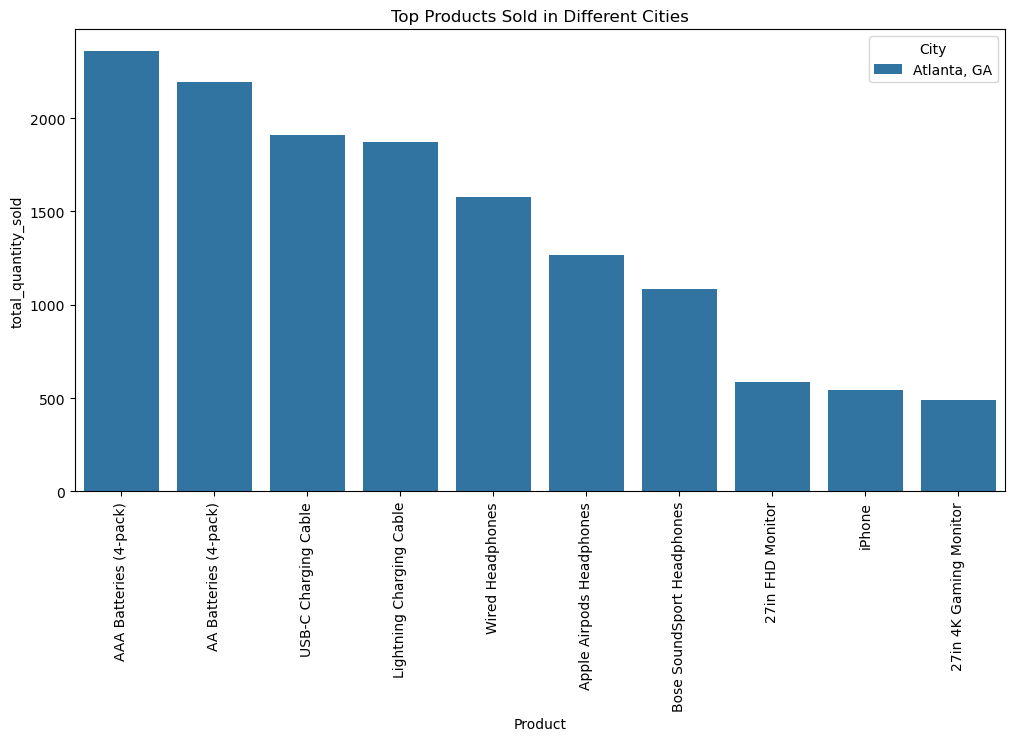

In [27]:
city_product_preferences = sales_data.groupby(['City', 'Product']).agg(
    total_quantity_sold=('Quantity Ordered', 'sum'),
    total_revenue=('Revenue', 'sum')
).reset_index()

city_product_preferences_sorted = city_product_preferences.sort_values(by=['City', 'total_quantity_sold'], ascending=[True, False])

print("City-Wise Product Preferences:")
print(city_product_preferences_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='total_quantity_sold', hue='City', data=city_product_preferences_sorted.head(10))
plt.xticks(rotation=90)
plt.title("Top Products Sold in Different Cities")
plt.show()


Weekly Sales Trends:
    Week  total_sales
0      1    636646.16
1      2    409389.43
2      3    394921.11
3      4    426020.17
4      5    459570.62
5      6    565300.05
6      7    568199.28
7      8    535207.51
8      9    578306.44
9     10    640496.38
10    11    595771.07
11    12    629060.55
12    13    670872.96
13    14    774492.97
14    15    761454.22
15    16    805297.45
16    17    808694.68
17    18    764462.62
18    19    729309.99
19    20    695631.88
20    21    709784.55
21    22    668240.16
22    23    616368.48
23    24    594043.83
24    25    611609.50
25    26    576724.03
26    27    603246.53
27    28    609980.59
28    29    615306.48
29    30    562283.15
30    31    543200.60
31    32    550560.31
32    33    492928.48
33    34    490216.33
34    35    487735.61
35    36    478627.99
36    37    537174.09
37    38    434557.29
38    39    504087.68
39    40    798896.68
40    41    826120.83
41    42    846519.54
42    43    847292.99
43    44   

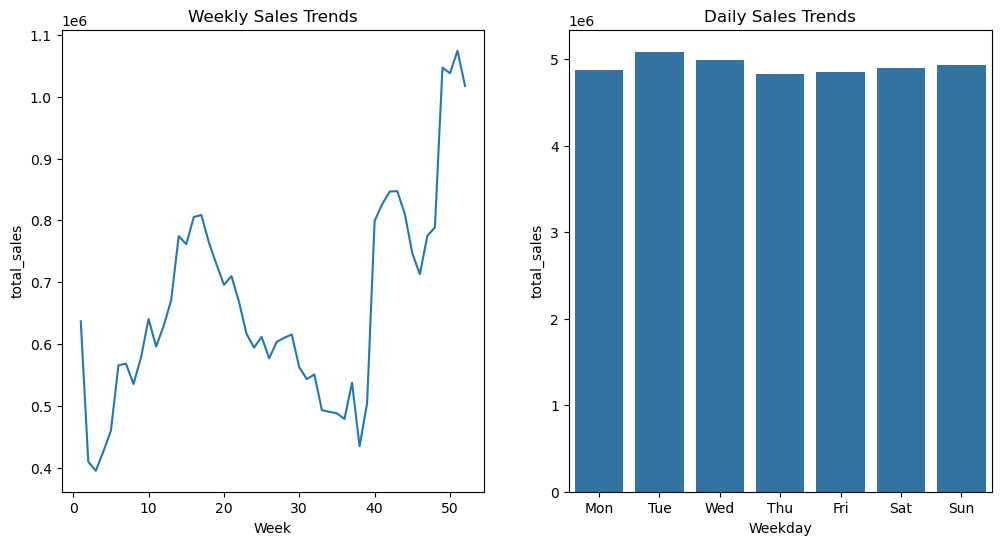

In [29]:
sales_data['Weekday'] = sales_data['Order Date'].dt.weekday  
sales_data['Week'] = sales_data['Order Date'].dt.isocalendar().week  

weekly_sales = sales_data.groupby('Week').agg(
    total_sales=('Revenue', 'sum')
).reset_index()

daily_sales = sales_data.groupby('Weekday').agg(
    total_sales=('Revenue', 'sum')
).reset_index()

busiest_days = daily_sales.sort_values(by='total_sales', ascending=False)

print("Weekly Sales Trends:")
print(weekly_sales)

print("\nDaily Sales Trends:")
print(daily_sales)

print("\nBusiest Days of the Week for Sales:")
print(busiest_days)

# Plot weekly and daily sales trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Week', y='total_sales', data=weekly_sales)
plt.title("Weekly Sales Trends")

plt.subplot(1, 2, 2)
sns.barplot(x='Weekday', y='total_sales', data=daily_sales)
plt.title("Daily Sales Trends")
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
